# Домашнее Задание 1: Линейная и Полиномиальная регрессия

## Загружаем библиотеки

In [273]:
import numpy as np
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

from scipy import stats
from scipy.interpolate import interp1d
from scipy import optimize

import csv

## Загружаем и анализируем датасет о зарплатах программистов в Украине

In [274]:
data_file = "/home/tarask/Documents/LABA_ML_Course/Code/LABA_ML_Tutorial/data/salaries/2010_october_clean.csv"
df = pd.read_csv(data_file, encoding = "utf-8" , engine='python')
print(df.columns)


Index(['Город', 'Years_of_experience', 'Стаж на текущем месте работы',
       'Специализация', 'Salary', 'Прибавка к зарплате', 'Размер компании',
       'Стаж', 'Стаж на текущем месте работы.1', 'ЗП'],
      dtype='object')


### Объединяем

In [275]:
# и убираем Nans с помощью .dropna()
df_exp = pd.to_numeric(df['Years_of_experience'].dropna())
df_salary = pd.to_numeric(df['Salary'].dropna())
df = pd.concat([df_exp, df_salary], axis=1).dropna()


### Визуализируем данные

No handles with labels found to put in legend.


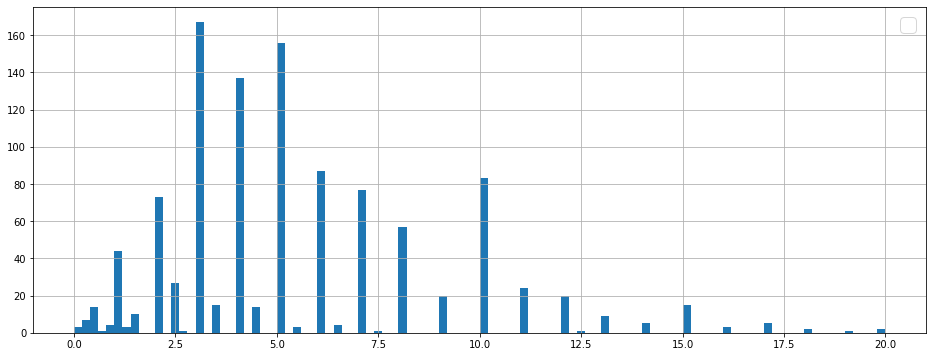

In [276]:
df['Years_of_experience'].hist(bins=100, figsize=(16,6))
plt.legend(fontsize=20)
plt.show()

No handles with labels found to put in legend.


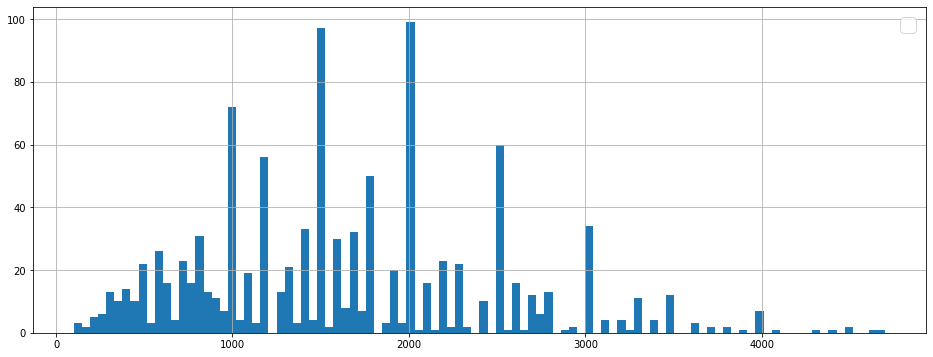

In [277]:
df['Salary'].hist(bins=100, figsize=(16,6))
plt.legend(fontsize=20)
plt.show()

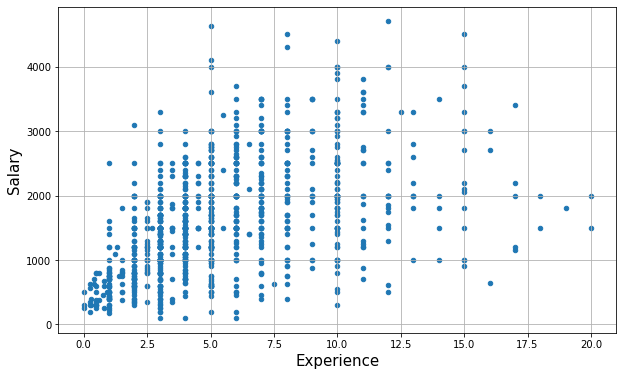

In [278]:
df.plot.scatter('Years_of_experience', 'Salary',  figsize=(10,6))
plt.xlabel('Experience', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.grid()

## Разделяем дата на выборки

In [279]:
x_data = np.expand_dims(df['Years_of_experience'].values, axis=1)
y_data = np.expand_dims(df['Salary'].values, axis=1)

# 20% данных будем использовать как validation dataset
val_size = 0.2

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data, test_size=val_size, shuffle=True)
print('Data points in train set: {0}.'.format(len(X_train)))
print('Data points in val set: {0}.'.format(len(X_val)))
print("Shape of features in training data: {}".format(X_train.shape))
print("Shape of output in training data: {}".format(y_train.shape))
print("Shape of features in val data: {}".format(X_val.shape))
print("Shape of output in val data: {}".format(y_val.shape))

Data points in train set: 876.
Data points in val set: 219.
Shape of features in training data: (876, 1)
Shape of output in training data: (876, 1)
Shape of features in val data: (219, 1)
Shape of output in val data: (219, 1)


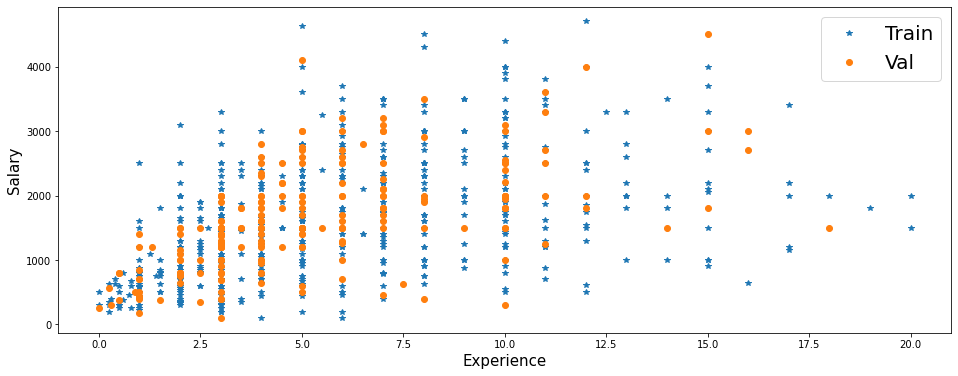

In [280]:
# Посмотрить показательный ли validation dataset
plt.figure(figsize=(16,6))
plt.plot(X_train, y_train, '*', label='Train')
plt.plot(X_val, y_val, 'o', label='Val')
plt.xlabel('Experience', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.legend(fontsize=20)
plt.show()

## Задание 1: Применить линейную регрессию

In [281]:
# Построить регресию


In [282]:
# Визуализовать результат

In [283]:
# Посчитать Коэффициент детерминации
# https://en.wikipedia.org/wiki/Coefficient_of_determination


## Задание 2: Применить полиномиальную регрессию

In [284]:
# Построить регрессию

In [285]:
# Попробывать разные значения полиномиальной степени и подобрать подходящее

## Задание 3: Найти и убрать outlier

In [286]:
# Найти outlier
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba


In [287]:
# Убрать outlier


In [288]:
# Сравнить новые результаты